In [8]:
import pandas as pd
import matplotlib.pyplot as plt

happiness2015 = pd.read_csv('../dataset/World_Happiness_2015.csv')
first_5 = happiness2015.head()
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

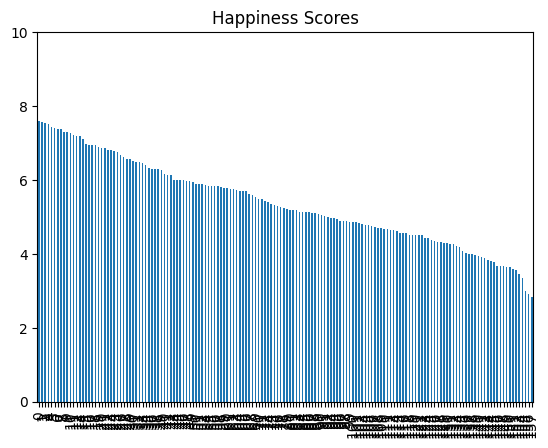

In [11]:
# Using Loops to Aggregate Data

happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0, 10))
plt.show()

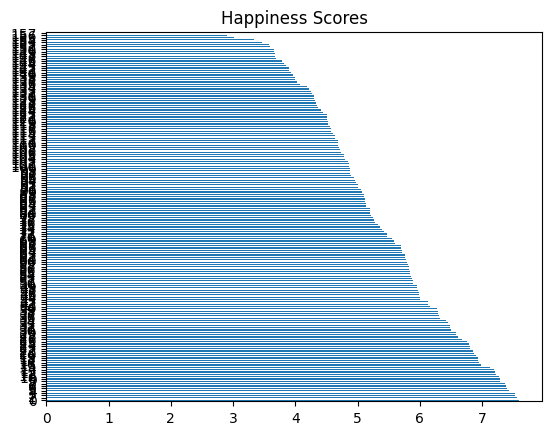

In [12]:
happiness2015['Happiness Score'].plot(kind='barh', title='Happiness Scores', ylim=(0, 10))
plt.show()

In [18]:
unique_regions = happiness2015['Region'].unique()
unique_regions

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

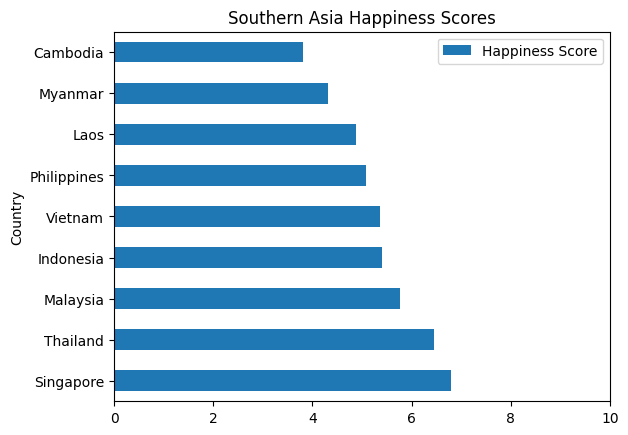

In [21]:
so_asia = happiness2015[happiness2015['Region'] == 'Southeastern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))
plt.show()

In [29]:
mean_happiness = {}
regions_group = happiness2015['Region'].unique()

for region in regions_group:
    region_group = happiness2015[happiness2015['Region'] == region]
    mean_happiness[region] = region_group['Happiness Score'].mean()
    

In [30]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    #1. Split the DataFrame into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r] = region_mean

In [38]:
# Creating GroupBy Objects
grouped = happiness2015.groupby('Region')
grouped.get_group('Australia and New Zealand')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [41]:
# Exploring GroupBy Objects - groups attribute
print(grouped.groups)

# Filter on indices 8 and 9 in happiness2015
happiness2015.iloc[8:10] # its simillar -> grouped.get_group('Australia and New Zealand')


{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [58]:
north_america = happiness2015[happiness2015['Region'] == 'North America']
na_group = grouped.get_group('North America')
equal = (north_america == na_group)

In [ ]:
# Common Aggregation Methods with Groupby

grouped = happiness2015.groupby('Region')
means_grouped = grouped.mean()

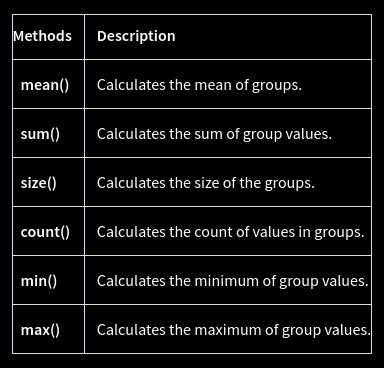

In [75]:
# Aggregating Specific Columns with Groupby

grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()
happy_mean


Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [ ]:
# Introduction to the Agg() Method

import numpy as np

grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']

def dif(group):
    return (group.max() - group.mean())

happy_mean_max  = happy_grouped.agg([np.mean, np.max])
mean_max_dif = happy_grouped.agg(dif)

print(happy_mean_max)
print(mean_max_dif)

In [92]:
# Computing Multiple and Custom Aggregations with the Agg() Method

import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean_max = happy_grouped.agg([np.mean, np.max])

# Performing the same procedure in a single line
happiness_means = happiness2015.groupby('Region')['Happiness Score'].agg(dif)

/tmp/ipykernel_482/2185074532.py:6: FutureWarning: The provided callable <function mean at 0x7eff5cb916c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  happy_mean_max = happy_grouped.agg([np.mean, np.max])
/tmp/ipykernel_482/2185074532.py:6: FutureWarning: The provided callable <function max at 0x7eff5cb90cc0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  happy_mean_max = happy_grouped.agg([np.mean, np.max])


Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

In [ ]:
# Aggregation with Pivot Tables
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)

# Using GroupBy
# happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
pv_happiness

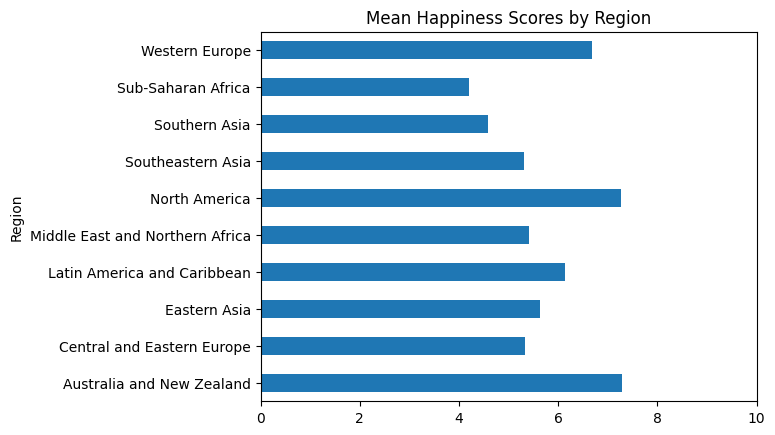

In [99]:
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region')
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)
plt.show()

/tmp/ipykernel_482/2054773805.py:1: FutureWarning: The provided callable <function mean at 0x7eff5cb916c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)


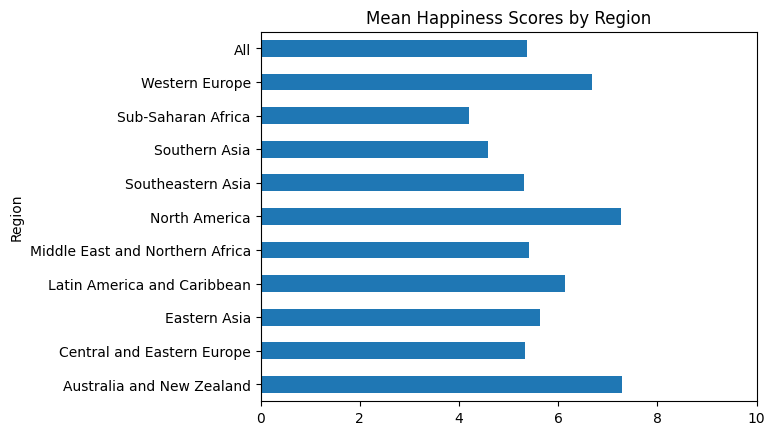

In [102]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)
plt.show()

In [104]:
# Aggregating Multiple Columns and Functions with Pivot Tables

grouped_by_region = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')
mean_min_max_by_region = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)
mean_min_max_by_region

/tmp/ipykernel_482/2250877114.py:4: FutureWarning: The provided callable <function mean at 0x7eff5cb916c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_min_max_by_region = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)
/tmp/ipykernel_482/2250877114.py:4: FutureWarning: The provided callable <function min at 0x7eff5cb90e00> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  mean_min_max_by_region = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)
/tmp/ipykernel_482/2250877114.py:4: FutureWarning: The provided callable <function max at 0x7eff5cb90cc0> is currently using DataFrameGroupBy.max. In a future version of panda

,mean,min,max
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


In [110]:
# Part 01 - Using GroupBy

grouped = happiness2015.groupby('Region')[['Happiness Score', 'Family']]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])

# Part 02 - Using Pivot_Table

pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region', aggfunc=[np.min, np.max, np.mean], margins=True)

pv_happy_family_stats


/tmp/ipykernel_482/2497824973.py:4: FutureWarning: The provided callable <function min at 0x7eff5cb90e00> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  happy_family_stats = grouped.agg([np.min, np.max, np.mean])
/tmp/ipykernel_482/2497824973.py:4: FutureWarning: The provided callable <function max at 0x7eff5cb90cc0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  happy_family_stats = grouped.agg([np.min, np.max, np.mean])
/tmp/ipykernel_482/2497824973.py:4: FutureWarning: The provided callable <function mean at 0x7eff5cb916c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  happy_family_stats = grouped.agg([np.min, n

min                      max  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734